* [1. importando librerias](#section1)
* [2. Cargando mi DataFrame](#section2)
 * [2.1 descripcion de mi DataFrame](#section21)
 * [2.2 Informacion de mi DataFrame](#section22)
 * [2.3 Visualizacion de Valores Nulos](#section23)
 * [2.4 Imputacion](#section24)
   * [2.4.1 Imputacion por la mediana "linea_sf"](#section241)
   * [2.4.2 Imputacion por la mediana "deuda_sf"](#section242)
   * [2.4.3 Imputacion por la mediana "exp_sf"](#section243)
* [3 Valores atipicos o outliers](#section3)
 * [3.1 Grafica de Cajas](#section31)
 * [3.2 Acotacion por percentiles](#section32)
* [4. Creacion de Variables dummy](#section4)
 * [4.1 Variables predictoras](#section41)
 * [4.2  Variable target](#section42)
   * [4.2.1  Cambiar de formato a la variable target 'mora'](#section421)
* [5. Particion en train y test](#section5)
* [6. Metricas](#section6)
 * [6.1 Gini](#section61)
   * [6.1.1 Forma_1](#section611)
   * [6.1.2 Forma_2](#section612)
 * [6.2 Matrix de Confusion](#section62)
   * [6.2.1 Creando tablita](#section621)
     * [6.2.1.1 Calculando](#section6211)
     * [6.2.1.2 Codigo](#section6212)


<a id="section1"></a>
## <font color="#004D7F">1. importando librerias</font>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 

<a id="section2"></a>
## <font color="#004D7F">2. Cargando mi DataFrame</font>

In [2]:
df=pd.read_csv("Datos_unalm/data.csv")

In [3]:
df.head(5)

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA
1,0,18,FAMILIAR,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA
2,0,0,FAMILIAR,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICA


<a id="section21"></a>
## <font color="#004D7F">2.1 descripcion de mi DataFrame</font>

In [4]:
df.describe()

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs
count,8399.000000,8399.00000,8399.000000,8399.000000,6569.000000,8399.000000,8399.000000,7272.000000,7938.000000,8399.000000,8399.000000
mean,0.704251,4.46315,36.399095,5555.888796,32.401583,10.593166,4350.406997,11987.241038,6110.724308,196.619955,0.563519
std,0.456406,14.27084,9.825764,2153.244140,32.866232,3.374619,5367.058953,21322.801655,11177.989799,19.544348,0.905637
min,0.000000,0.00000,20.000000,2956.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.000000
25%,0.000000,0.00000,29.000000,4174.000000,7.000000,12.000000,1366.670000,1169.372500,478.320000,182.000000,0.000000
50%,1.000000,0.00000,34.000000,4904.000000,20.000000,12.000000,2400.000000,4030.120000,2258.755000,197.000000,0.000000
75%,1.000000,2.00000,42.000000,6182.000000,51.000000,12.000000,4900.000000,12086.627500,5755.150000,212.000000,1.000000
max,1.000000,245.00000,85.000000,20700.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,4.000000


In [5]:
df.nivel_ahorro.value_counts()

12    6619
0      487
11     330
10     168
9      128
8      102
4      102
6       94
1       89
2       75
7       75
5       70
3       60
Name: nivel_ahorro, dtype: int64

#### Descripcion:
la variable target:

y= 0:moroso  1:no es moroso.

las variables predictoras:

1.atraso : meses de atraso<br>
2.vivienda:<br> 
3.edad<br>
4.dias laborales: dias_lab<br>
5.nivel de ahorro: rango 1-12<br>
6.ingreso:<br>
7.linea_sf<br>
8.deuda_sf<br>
9.score<br>
10.clasif_sbs

In [6]:
df.shape

(8399, 14)

<a id="section22"></a>
## <font color="#004D7F">2.2 Informacion de mi DataFrame</font>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mora          8399 non-null   int64  
 1   atraso        8399 non-null   int64  
 2   vivienda      8399 non-null   object 
 3   edad          8399 non-null   int64  
 4   dias_lab      8399 non-null   int64  
 5   exp_sf        6569 non-null   float64
 6   nivel_ahorro  8399 non-null   int64  
 7   ingreso       8399 non-null   float64
 8   linea_sf      7272 non-null   float64
 9   deuda_sf      7938 non-null   float64
 10  score         8399 non-null   int64  
 11  zona          8399 non-null   object 
 12  clasif_sbs    8399 non-null   int64  
 13  nivel_educ    8399 non-null   object 
dtypes: float64(4), int64(7), object(3)
memory usage: 918.8+ KB


In [8]:
df.dtypes

mora              int64
atraso            int64
vivienda         object
edad              int64
dias_lab          int64
exp_sf          float64
nivel_ahorro      int64
ingreso         float64
linea_sf        float64
deuda_sf        float64
score             int64
zona             object
clasif_sbs        int64
nivel_educ       object
dtype: object

<a id="section23"></a>
## <font color="#004D7F">2.3 Visualizacion de Valores Nulos</font>

<AxesSubplot:>

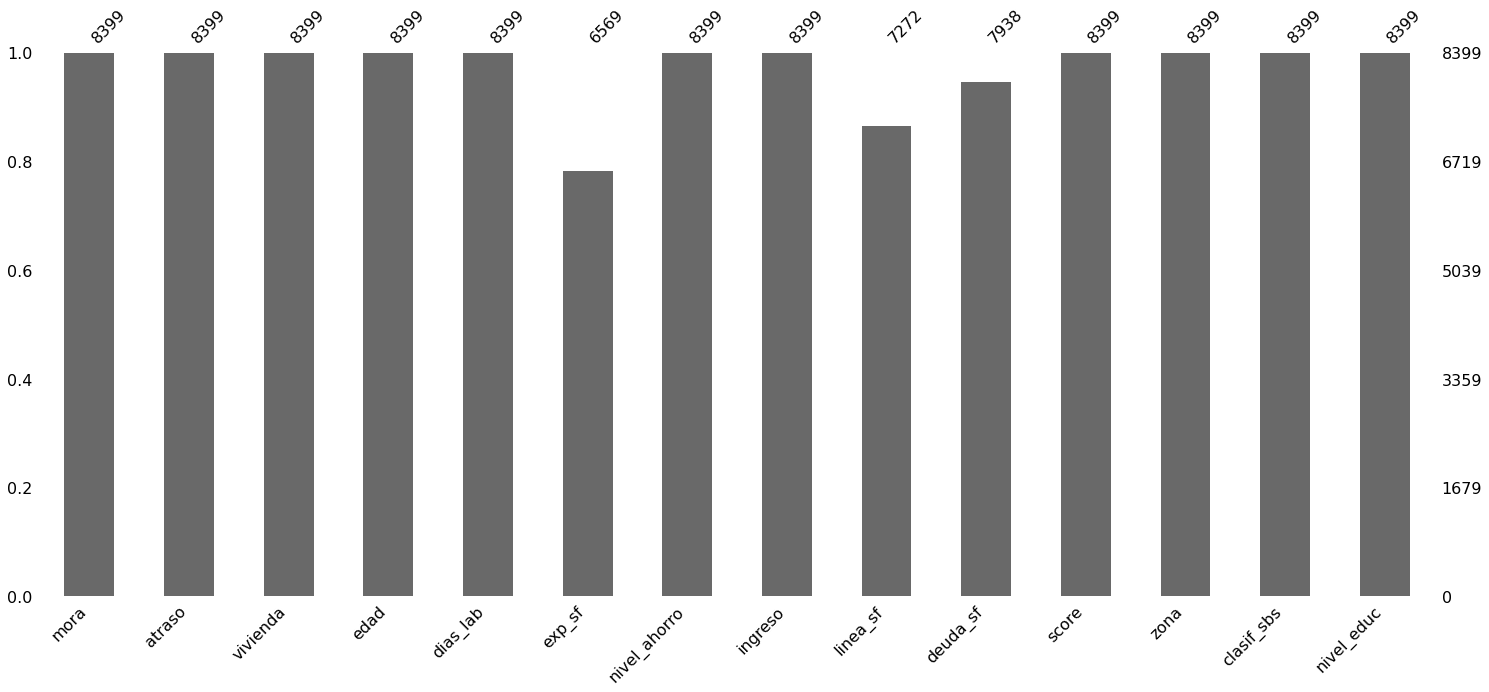

In [9]:
import missingno as msno
msno.bar(df)

In [10]:
df.isnull().sum()

mora               0
atraso             0
vivienda           0
edad               0
dias_lab           0
exp_sf          1830
nivel_ahorro       0
ingreso            0
linea_sf        1127
deuda_sf         461
score              0
zona               0
clasif_sbs         0
nivel_educ         0
dtype: int64

In [11]:
df.columns

Index(['mora', 'atraso', 'vivienda', 'edad', 'dias_lab', 'exp_sf',
       'nivel_ahorro', 'ingreso', 'linea_sf', 'deuda_sf', 'score', 'zona',
       'clasif_sbs', 'nivel_educ'],
      dtype='object')

<a id="section24"></a>
## <font color="#004D7F">2.4 Imputacion</font>

<a id="section241"></a>
## <font color="#004D7F">2.4.1 Imputacion por la mediana "linea_sf"</font>

<AxesSubplot:>

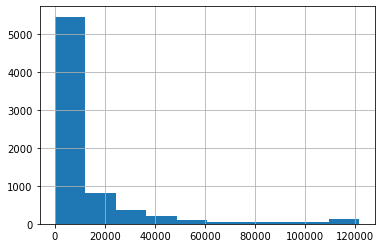

In [12]:
df.linea_sf.hist()

In [13]:
df1=df

In [14]:
df1.linea_sf.describe()

count      7272.000000
mean      11987.241038
std       21322.801655
min           0.000000
25%        1169.372500
50%        4030.120000
75%       12086.627500
max      121543.400000
Name: linea_sf, dtype: float64

#### Imputamos por la mediana ya que toma valores de un rango de [0 : 121543.400000 ] ademas la std es 21322.801655

In [15]:
df1["mediana_linea_sf"]=df1["linea_sf"].fillna(df1["linea_sf"].median())

<AxesSubplot:>

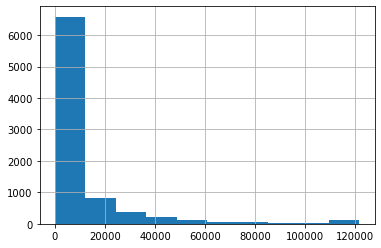

In [16]:
df1.mediana_linea_sf.hist()

In [17]:
df1.mediana_linea_sf.isnull().sum()

0

In [18]:
df1.linea_sf.isnull().sum()

1127

<a id="section242"></a>
## <font color="#004D7F">2.4.2 Imputacion por la mediana "deuda_sf"</font>

<AxesSubplot:>

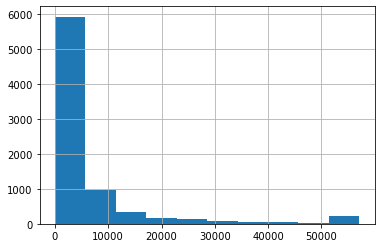

In [19]:
df.deuda_sf.hist()

In [20]:
df2=df1

In [21]:
df2.head(2)

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ,mediana_linea_sf
0,0,235,FAMILIAR,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA,4030.12
1,0,18,FAMILIAR,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA,1824.67


In [22]:
df2.deuda_sf.describe()

count     7938.000000
mean      6110.724308
std      11177.989799
min          0.000000
25%        478.320000
50%       2258.755000
75%       5755.150000
max      57094.380000
Name: deuda_sf, dtype: float64

#### Imputamos por la mediana ya que toma valores de un rango de [0 : 57094.380000 ] ademas la std es 11177.989799

In [23]:
df2["mediana_deuda_sf"]=df1["deuda_sf"].fillna(df2["deuda_sf"].median())

<AxesSubplot:>

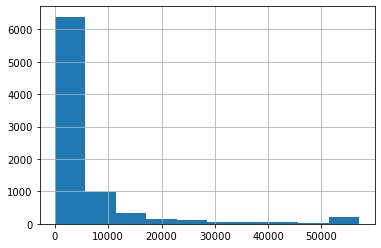

In [24]:
df2.mediana_deuda_sf.hist()

In [25]:
df2.mediana_deuda_sf.isnull().sum()

0

In [26]:
df2.deuda_sf.isnull().sum()

461

<a id="section243"></a>
## <font color="#004D7F">2.4.3 Imputacion por la mediana "exp_sf"</font>

<AxesSubplot:>

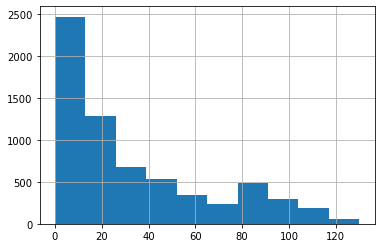

In [27]:
df.exp_sf.hist()

In [28]:
df3=df2

In [29]:
df3.exp_sf.describe()

count    6569.000000
mean       32.401583
std        32.866232
min         0.000000
25%         7.000000
50%        20.000000
75%        51.000000
max       130.000000
Name: exp_sf, dtype: float64

In [30]:
df3["mediana_exp_sf"]=df2["exp_sf"].fillna(df2["exp_sf"].median())

<AxesSubplot:>

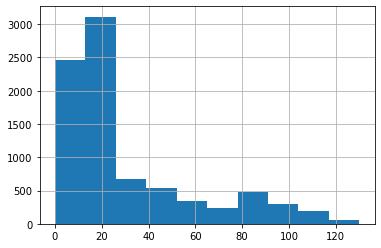

In [31]:
df3.mediana_exp_sf.hist()

In [32]:
df3.mediana_exp_sf.isnull().sum()

0

In [33]:
df.exp_sf.isnull().sum()

1830

<a id="section3"></a>
## <font color="#004D7F">3 Valores atipicos o outliers</font>

<a id="section31"></a>
## <font color="#004D7F">3.1 Grafica de Cajas</font>

<AxesSubplot:>

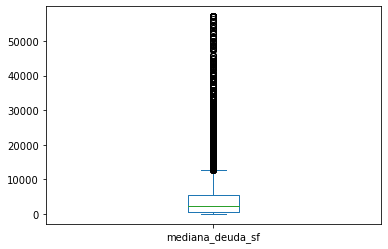

In [34]:
df3.mediana_deuda_sf.plot.box()

<a id="section32"></a>
## <font color="#004D7F">3.2 Acotacion por percentiles</font>

####  Acotacion por los percentiles 0% y 90% 

In [35]:
cotas_mediana_deuda_sf=np.percentile(df3[-df3.mediana_deuda_sf.isnull()]["mediana_deuda_sf"],[0,90])

In [36]:
cotas_mediana_deuda_sf

array([    0.  , 14563.87])

In [37]:
cotas_mediana_deuda_sf[1]

14563.87

In [38]:
df3.loc[df3.mediana_deuda_sf>=cotas_mediana_deuda_sf[1],'mediana_deuda_sf']=cotas_mediana_deuda_sf[1]

In [39]:
df3.loc[df3.mediana_deuda_sf<=cotas_mediana_deuda_sf[0],'mediana_deuda_sf']=cotas_mediana_deuda_sf[0]

#### Corroborando

#### El valor minimo 

In [40]:
df3.mediana_deuda_sf.min()

0.0

#### El valor maximo 

In [41]:
df3.mediana_deuda_sf.max()

14563.87

<AxesSubplot:>

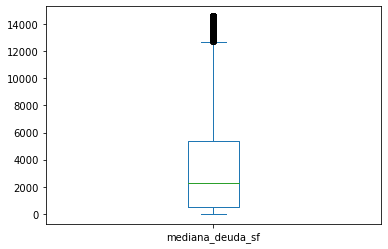

In [42]:
df3.mediana_deuda_sf.plot.box()

In [43]:
df3.head(5)

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ,mediana_linea_sf,mediana_deuda_sf,mediana_exp_sf
0,0,235,FAMILIAR,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA,4030.12,0.00,93.0
1,0,18,FAMILIAR,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA,1824.67,1933.75,9.0
2,0,0,FAMILIAR,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,UNIVERSITARIA,2797.38,188.29,8.0
3,0,0,FAMILIAR,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICA,4030.12,0.00,20.0
4,0,0,FAMILIAR,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICA,2000.00,11010.65,20.0


##### Comentario :
la variable "mediana_deuda_sf" : Se imputo por la mediana y ademas se acoto por los percentiles 0% y 90 %(outliers o atipicos) 

<a id="section4"></a>
## <font color="#004D7F">4. Creacion de Variables dummy</font>

In [44]:
df3.columns

Index(['mora', 'atraso', 'vivienda', 'edad', 'dias_lab', 'exp_sf',
       'nivel_ahorro', 'ingreso', 'linea_sf', 'deuda_sf', 'score', 'zona',
       'clasif_sbs', 'nivel_educ', 'mediana_linea_sf', 'mediana_deuda_sf',
       'mediana_exp_sf'],
      dtype='object')

In [45]:
df3.vivienda.value_counts()

FAMILIAR     5853
PROPIA       2381
ALQUILADA     165
Name: vivienda, dtype: int64

### Variable dummy ---> vivienda <---

In [46]:
dummy_vivienda=pd.get_dummies(df3['vivienda'],prefix='dummy1')

In [47]:
dummy_vivienda

,dummy1_ALQUILADA,dummy1_FAMILIAR,dummy1_PROPIA
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
8394,0,0,1
8395,0,1,0
8396,0,1,0
8397,0,0,1


### Variable dummy --->nivel educativo<---

In [48]:
dummy_educativo=pd.get_dummies(df3['nivel_educ'],prefix='dummy2')

In [49]:
dummy_educativo

,dummy2_SECUNDARIA,dummy2_SIN EDUCACION,dummy2_TECNICA,dummy2_UNIVERSITARIA
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
8394,0,0,0,1
8395,0,0,0,1
8396,0,0,0,1
8397,0,0,0,1


In [50]:
df4=df3

In [51]:
df4=pd.concat([dummy_educativo,dummy_vivienda,df3],axis=1)

In [52]:
df4.head(2)

,dummy2_SECUNDARIA,dummy2_SIN EDUCACION,dummy2_TECNICA,dummy2_UNIVERSITARIA,dummy1_ALQUILADA,dummy1_FAMILIAR,dummy1_PROPIA,mora,atraso,vivienda,...,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ,mediana_linea_sf,mediana_deuda_sf,mediana_exp_sf
0,0,0,0,1,0,1,0,0,235,FAMILIAR,...,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA,4030.12,0.00,93.0
1,0,0,1,0,0,1,0,0,18,FAMILIAR,...,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA,1824.67,1933.75,9.0


In [53]:
df4.columns

Index(['dummy2_SECUNDARIA', 'dummy2_SIN EDUCACION', 'dummy2_TECNICA',
       'dummy2_UNIVERSITARIA', 'dummy1_ALQUILADA', 'dummy1_FAMILIAR',
       'dummy1_PROPIA', 'mora', 'atraso', 'vivienda', 'edad', 'dias_lab',
       'exp_sf', 'nivel_ahorro', 'ingreso', 'linea_sf', 'deuda_sf', 'score',
       'zona', 'clasif_sbs', 'nivel_educ', 'mediana_linea_sf',
       'mediana_deuda_sf', 'mediana_exp_sf'],
      dtype='object')

In [54]:
df4.shape

(8399, 24)

### Una vez creada las variables de 'vivienda' y 'nivel_educativo' se procede eliminarlos

In [55]:
df5=df4.drop(['nivel_educ','vivienda'],axis=1)

In [56]:
df5.shape

(8399, 22)

### Con respecto a la variable 'zona' la categoria 'Lima' tiene un alto cardinal por lo tanto se elimina <br>la variable 'zona'

In [57]:
df5.zona.value_counts()

Lima             4980
Callao            507
La Libertad       447
Arequipa          349
Ica               300
Piura             279
Lambayeque        279
Junin             263
Ancash            224
Cajamarca         173
Loreto            118
Cuzco              96
Ucayali            85
Pasco              53
Moquegua           46
San Martin         45
Huanuco            37
Tacna              32
Puno               23
Ayacucho           23
Tumbes             22
Apurimac            8
Madre de Dios       6
Huancavelica        3
Amazonas            1
Name: zona, dtype: int64

In [58]:
df5=df5.drop(['zona'],axis=1)

In [59]:
df5.shape

(8399, 21)

### En resumen:
#### -----------
#### 1.estamos quitando estas variables cualitativas 'nivel_educ' , 'vivienda' ya que hemos creado variables dummy.
#### 2.estamos quitando eliminando la variable 'zona'  porque la categoria 'lima' tiene un alto cardinal comparado a las otras<br>categorias.

### Separamos la variable target :

In [60]:
df5.columns

Index(['dummy2_SECUNDARIA', 'dummy2_SIN EDUCACION', 'dummy2_TECNICA',
       'dummy2_UNIVERSITARIA', 'dummy1_ALQUILADA', 'dummy1_FAMILIAR',
       'dummy1_PROPIA', 'mora', 'atraso', 'edad', 'dias_lab', 'exp_sf',
       'nivel_ahorro', 'ingreso', 'linea_sf', 'deuda_sf', 'score',
       'clasif_sbs', 'mediana_linea_sf', 'mediana_deuda_sf', 'mediana_exp_sf'],
      dtype='object')

<a id="section41"></a>
## <font color="#004D7F">4.1 Variables predictoras</font>

In [61]:
lista=['dummy2_SECUNDARIA', 'dummy2_SIN EDUCACION', 'dummy2_TECNICA',
       'dummy2_UNIVERSITARIA', 'dummy1_ALQUILADA', 'dummy1_FAMILIAR',
       'dummy1_PROPIA', 'atraso', 'edad', 'dias_lab',
       'nivel_ahorro', 'ingreso', 'score',
       'clasif_sbs', 'mediana_linea_sf', 'mediana_deuda_sf', 'mediana_exp_sf']

In [62]:
x5=df5[lista]

In [63]:
x5.columns

Index(['dummy2_SECUNDARIA', 'dummy2_SIN EDUCACION', 'dummy2_TECNICA',
       'dummy2_UNIVERSITARIA', 'dummy1_ALQUILADA', 'dummy1_FAMILIAR',
       'dummy1_PROPIA', 'atraso', 'edad', 'dias_lab', 'nivel_ahorro',
       'ingreso', 'score', 'clasif_sbs', 'mediana_linea_sf',
       'mediana_deuda_sf', 'mediana_exp_sf'],
      dtype='object')

In [64]:
x5.isnull().sum()

dummy2_SECUNDARIA       0
dummy2_SIN EDUCACION    0
dummy2_TECNICA          0
dummy2_UNIVERSITARIA    0
dummy1_ALQUILADA        0
dummy1_FAMILIAR         0
dummy1_PROPIA           0
atraso                  0
edad                    0
dias_lab                0
nivel_ahorro            0
ingreso                 0
score                   0
clasif_sbs              0
mediana_linea_sf        0
mediana_deuda_sf        0
mediana_exp_sf          0
dtype: int64

In [65]:
df4.isnull().sum()

dummy2_SECUNDARIA          0
dummy2_SIN EDUCACION       0
dummy2_TECNICA             0
dummy2_UNIVERSITARIA       0
dummy1_ALQUILADA           0
dummy1_FAMILIAR            0
dummy1_PROPIA              0
mora                       0
atraso                     0
vivienda                   0
edad                       0
dias_lab                   0
exp_sf                  1830
nivel_ahorro               0
ingreso                    0
linea_sf                1127
deuda_sf                 461
score                      0
zona                       0
clasif_sbs                 0
nivel_educ                 0
mediana_linea_sf           0
mediana_deuda_sf           0
mediana_exp_sf             0
dtype: int64

<a id="section42"></a>
## <font color="#004D7F">4.2  Variable target</font>

In [66]:
y5=df5['mora']

In [67]:
y5.head(5)

0    0
1    0
2    0
3    0
4    0
Name: mora, dtype: int64

In [68]:
y5.value_counts()

1    5915
0    2484
Name: mora, dtype: int64

<a id="section421"></a>
## <font color="#004D7F">4.2.1  Cambiar de formato a la variable target 'mora'</font>

#### Cambiar de formato a la variable target 'mora'   <br> antes --> int <br> ahora -->object

In [69]:
df5['mora']=df5['mora'].astype(str)

In [70]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dummy2_SECUNDARIA     8399 non-null   uint8  
 1   dummy2_SIN EDUCACION  8399 non-null   uint8  
 2   dummy2_TECNICA        8399 non-null   uint8  
 3   dummy2_UNIVERSITARIA  8399 non-null   uint8  
 4   dummy1_ALQUILADA      8399 non-null   uint8  
 5   dummy1_FAMILIAR       8399 non-null   uint8  
 6   dummy1_PROPIA         8399 non-null   uint8  
 7   mora                  8399 non-null   object 
 8   atraso                8399 non-null   int64  
 9   edad                  8399 non-null   int64  
 10  dias_lab              8399 non-null   int64  
 11  exp_sf                6569 non-null   float64
 12  nivel_ahorro          8399 non-null   int64  
 13  ingreso               8399 non-null   float64
 14  linea_sf              7272 non-null   float64
 15  deuda_sf             

In [71]:
y5=df5['mora']

In [72]:
y5.head(5)

0    0
1    0
2    0
3    0
4    0
Name: mora, dtype: object

<a id="section5"></a>
## <font color="#004D7F">5. Particion en train y test</font>

In [73]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x5,y5,test_size=0.2,random_state=4)

#### paso 1 : modelito

In [74]:
from sklearn import linear_model
modelito=linear_model.LogisticRegression()

#### paso 2: ajustar

In [75]:
modelito.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
x5.shape

(8399, 17)

In [77]:
xtrain.shape

(6719, 17)

In [78]:
xtest.shape

(1680, 17)

In [79]:
xtrain.columns

Index(['dummy2_SECUNDARIA', 'dummy2_SIN EDUCACION', 'dummy2_TECNICA',
       'dummy2_UNIVERSITARIA', 'dummy1_ALQUILADA', 'dummy1_FAMILIAR',
       'dummy1_PROPIA', 'atraso', 'edad', 'dias_lab', 'nivel_ahorro',
       'ingreso', 'score', 'clasif_sbs', 'mediana_linea_sf',
       'mediana_deuda_sf', 'mediana_exp_sf'],
      dtype='object')

### Coeficiente de Determinacion ! R2

In [80]:
modelito.score(xtrain,ytrain)

0.7242149129334723

#### Comentario:<br>Es mayor al 50% es decir que relatiuvamente es bueno

### Coeficientes del modelo de regresion logistica binomial

In [81]:
modelito.coef_

array([[ 1.18757387e-04,  4.87123903e-05,  1.77191790e-03,
        -1.34587227e-03,  1.33261533e-04,  9.81214152e-04,
        -5.20960281e-04,  2.76425739e-02,  8.91654431e-03,
        -3.49935281e-05, -6.58487533e-03, -2.51150491e-05,
         6.00141071e-03,  2.98522421e-03, -1.00655857e-05,
         3.99505286e-05, -1.37803194e-02]])

In [82]:
modelito.coef_.shape

(1, 17)

In [83]:
pd.DataFrame(list(zip(x5.columns, np.transpose(modelito.coef_))))

,0,1
0,dummy2_SECUNDARIA,[0.00011875738664283403]
1,dummy2_SIN EDUCACION,[4.871239033356936e-05]
2,dummy2_TECNICA,[0.001771917901651177]
3,dummy2_UNIVERSITARIA,[-0.0013458722746239658]
4,dummy1_ALQUILADA,[0.0001332615331196549]
5,dummy1_FAMILIAR,[0.0009812141521323614]
6,dummy1_PROPIA,[-0.0005209602812518622]
7,atraso,[0.027642573939559337]
8,edad,[0.008916544309271359]
9,dias_lab,[-3.499352806999731e-05]


<a id="section6"></a>
## <font color="#004D7F">6. Metricas</font>

<a id="section61"></a>
## <font color="#004D7F">6.1 Gini</font>

- **NOTA**<BR>
    - Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

<a id="section611"></a>
## <font color="#004D7F">6.1.1 Forma_1</font>

### Creando una Funcion

In [84]:
def Gini(y_real_clase,y_predicho_probalidad,signo='+'):
    from sklearn.metrics import roc_auc_score    
    return 2*roc_auc_score(y_real_clase,y_predicho_probalidad)-1

#score (esto es un valor numerico)
#Gini = 2*AUC-1  -->gini por encima de 60 son modelos muy buenos!!
#y_true  y_pred  -->estos son del entrenamiento

### Probalidad

In [85]:
y_train_predicho_prob=modelito.predict_proba(xtrain)

In [86]:
y_train_predicho_prob

array([[0.11028806, 0.88971194],
       [0.26945827, 0.73054173],
       [0.28403744, 0.71596256],
       ...,
       [0.22586817, 0.77413183],
       [0.19338547, 0.80661453],
       [0.27349715, 0.72650285]])

In [87]:
y_train_predicho_prob=y_train_predicho_prob[:,1:]

In [88]:
y_train_predicho_prob

array([[0.88971194],
       [0.73054173],
       [0.71596256],
       ...,
       [0.77413183],
       [0.80661453],
       [0.72650285]])

### Clase

In [89]:
y_info=pd.DataFrame(ytrain)

In [90]:
y_info

,mora
5719,1
2404,1
4625,1
6015,0
5346,0
...,...
456,0
6017,1
709,0
8366,1


In [91]:
y_info=ytrain.reset_index();y_info#indice

,index,mora
0,5719,1
1,2404,1
2,4625,1
3,6015,0
4,5346,0
...,...,...
6714,456,0
6715,6017,1
6716,709,0
6717,8366,1


In [92]:
y_info

,index,mora
0,5719,1
1,2404,1
2,4625,1
3,6015,0
4,5346,0
...,...,...
6714,456,0
6715,6017,1
6716,709,0
6717,8366,1


In [93]:
y_info['y_train_predicho_prob']=y_train_predicho_prob

In [94]:
y_info

,index,mora,y_train_predicho_prob
0,5719,1,0.889712
1,2404,1,0.730542
2,4625,1,0.715963
3,6015,0,0.812668
4,5346,0,0.683459
...,...,...,...
6714,456,0,0.847159
6715,6017,1,0.798402
6716,709,0,0.774132
6717,8366,1,0.806615


### Gini(y_real_clase,y_predicho_probalidad,signo='+')

In [95]:
Gini(y_info['mora'],y_info['y_train_predicho_prob'])

0.308371306456122

In [96]:
y_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  6719 non-null   int64  
 1   mora                   6719 non-null   object 
 2   y_train_predicho_prob  6719 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.6+ KB


<a id="section612"></a>
## <font color="#004D7F">6.1.2 Forma_2</font>

In [97]:
from sklearn import metrics

### Para hallar el GINI NECESITAMOS LA VARIABLE TARGET EN formato NUMERICO

### paso 1

In [98]:
y_info['mora_numerico']=y_info.mora.astype(int)

In [99]:
y_info.columns

Index(['index', 'mora', 'y_train_predicho_prob', 'mora_numerico'], dtype='object')

In [100]:
y_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  6719 non-null   int64  
 1   mora                   6719 non-null   object 
 2   y_train_predicho_prob  6719 non-null   float64
 3   mora_numerico          6719 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 183.8+ KB


### paso 2

In [101]:
prob_final=modelito.predict_proba(xtrain);prob_final# probalidad de la clase 1 y la clase 0

array([[0.11028806, 0.88971194],
       [0.26945827, 0.73054173],
       [0.28403744, 0.71596256],
       ...,
       [0.22586817, 0.77413183],
       [0.19338547, 0.80661453],
       [0.27349715, 0.72650285]])

In [102]:
prob_f2 = prob_final[:,1];prob_f2# probalidad de la clase 1

array([0.88971194, 0.73054173, 0.71596256, ..., 0.77413183, 0.80661453,
       0.72650285])

### paso 3

In [103]:
punto_de_corte=0.5

tpr= tasa de verdaderos positivos //  fpr = tasa de falsos positivos

In [104]:
fpr, tpr, punto_de_corte = metrics.roc_curve(y_info["mora_numerico"], prob_f2)

In [105]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.654185653228061

### paso 4

In [106]:
Gini=2*roc_auc -1
Gini

0.308371306456122

### paso 5 -> kolmogorov 

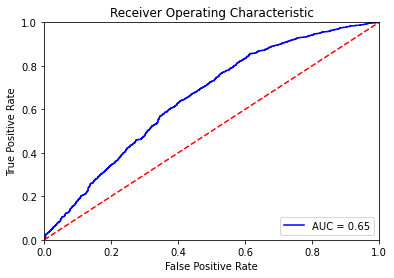

In [107]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
ks=max(tpr-fpr)
print("el ratio ks es %0.2f:" % ks)

el ratio ks es 0.24:


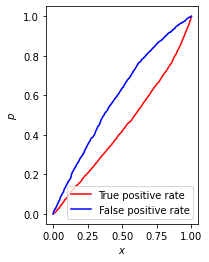

In [109]:
import matplotlib.pyplot as plt
import numpy as np
#non defaults
# sort the data:
data_sorted = np.sort(fpr)

# calculate the proportional values of samples
p = 1. * np.arange(len(fpr)) / (len(fpr) - 1)

#defaults
data_sorted2= np.sort(tpr)

# calculate the proportional values of samples
p2 = 1. * np.arange(len(tpr)) / (len(tpr) - 1)
# plot the sorted data:
fig = plt.figure()
#ax1 = fig.add_subplot(121)
#ax1.plot(p, data_sorted)
#ax1.set_xlabel('$p$')
#ax1.set_ylabel('$x$')

ax1 = fig.add_subplot(122)
#def
ax1.plot(data_sorted2, p2,'r',label = 'True positive rate')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$p$')
#nodef
ax1.plot(data_sorted, p,'b', label = 'False positive rate')
plt.legend(loc = 'lower right')

<a id="section62"></a>
## <font color="#004D7F">6.2 Matrix de Confusion</font>

In [110]:
punto_de_corte = 0.5

y_info["y_train_predicho_clase"]=np.where(y_train_predicho_prob>punto_de_corte, 1, 0)
y_info

,index,mora,y_train_predicho_prob,mora_numerico,y_train_predicho_clase
0,5719,1,0.889712,1,1
1,2404,1,0.730542,1,1
2,4625,1,0.715963,1,1
3,6015,0,0.812668,0,1
4,5346,0,0.683459,0,1
...,...,...,...,...,...
6714,456,0,0.847159,0,1
6715,6017,1,0.798402,1,1
6716,709,0,0.774132,0,1
6717,8366,1,0.806615,1,1


<a id="section621"></a>
## <font color="#004D7F">6.2.1 Creando tablita</font>

<a id="section6211"></a>
## <font color="#004D7F">6.2.1.1 Caculando</font>

In [111]:
y_info.y_train_predicho_clase.value_counts()

1    6085
0     634
Name: y_train_predicho_clase, dtype: int64

In [112]:
y_info.mora.value_counts()

1    4730
0    1989
Name: mora, dtype: int64

In [113]:
pd.crosstab(y_info.mora,y_info.y_train_predicho_clase)

y_train_predicho_clase,0,1
mora,,
0,385,1604
1,249,4481


In [114]:
tabla=np.array([[385,1604],[249,4481]]);tabla

array([[ 385, 1604],
       [ 249, 4481]])

In [115]:
vn=tabla[0,0];vn

385

In [116]:
vp=tabla[1,1];vp

4481

In [117]:
fp=tabla[0,1];fp

1604

In [118]:
fn=tabla[1,0];fn

249

In [119]:
total=vp+vn+fp+fn;total

6719

In [120]:
sensibilidad=vp/(vp+fn);sensibilidad

0.9473572938689218

In [121]:
especificidad=vn/(vn+fp);especificidad

0.19356460532931122

In [122]:
precision=vp/(fp+vp);precision

0.7364009860312243

In [123]:
valor_predictivo_negativo=vn/(vn+fn);valor_predictivo_negativo

0.6072555205047319

<a id="section6212"></a>
## <font color="#004D7F">6.2.1.2 Codigo</font>

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [125]:
y_info

,index,mora,y_train_predicho_prob,mora_numerico,y_train_predicho_clase
0,5719,1,0.889712,1,1
1,2404,1,0.730542,1,1
2,4625,1,0.715963,1,1
3,6015,0,0.812668,0,1
4,5346,0,0.683459,0,1
...,...,...,...,...,...
6714,456,0,0.847159,0,1
6715,6017,1,0.798402,1,1
6716,709,0,0.774132,0,1
6717,8366,1,0.806615,1,1


In [126]:
y_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6719 non-null   int64  
 1   mora                    6719 non-null   object 
 2   y_train_predicho_prob   6719 non-null   float64
 3   mora_numerico           6719 non-null   int32  
 4   y_train_predicho_clase  6719 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 210.1+ KB


In [127]:
y_info['y_train_predicho_clase']=y_info['y_train_predicho_clase'].astype(str)

In [128]:
y_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6719 non-null   int64  
 1   mora                    6719 non-null   object 
 2   y_train_predicho_prob   6719 non-null   float64
 3   mora_numerico           6719 non-null   int32  
 4   y_train_predicho_clase  6719 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 236.3+ KB


In [129]:
print(confusion_matrix(y_info.mora,y_info.y_train_predicho_clase)) # real , predicho ambos deben estar formatop object

[[ 385 1604]
 [ 249 4481]]


In [130]:
print(classification_report(y_info.mora,y_info.y_train_predicho_clase))

              precision    recall  f1-score   support

           0       0.61      0.19      0.29      1989
           1       0.74      0.95      0.83      4730

    accuracy                           0.72      6719
   macro avg       0.67      0.57      0.56      6719
weighted avg       0.70      0.72      0.67      6719

